In [1]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Some other example server values are
# server = 'localhost\sqlexpress' # for a named instance
# server = 'myserver,port' # to specify an alternate port
server = 'ERPDB' 
database = 'TEST0429' 
username = 'test' 
password = 'apple123' 
conn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = conn.cursor()

In [2]:
cursor.execute('SELECT* FROM [TEST0429].[dbo].[Order vs Purchase time series full outer join]')

for row in cursor:
    print(row)

(datetime.datetime(2014, 1, 15, 0, 0), Decimal('0.000000'), Decimal('5652240.000000'), Decimal('0.000000'))
(datetime.datetime(2014, 2, 15, 0, 0), Decimal('0.000000'), Decimal('1595675.000000'), Decimal('0.000000'))
(datetime.datetime(2014, 3, 15, 0, 0), Decimal('0.000000'), Decimal('3270100.000000'), Decimal('0.000000'))
(datetime.datetime(2014, 4, 15, 0, 0), Decimal('0.000000'), Decimal('1180760.000000'), Decimal('0.000000'))
(datetime.datetime(2014, 5, 7, 0, 0), Decimal('0.000000'), Decimal('500000.000000'), Decimal('0.000000'))
(datetime.datetime(2014, 5, 14, 0, 0), Decimal('0.000000'), Decimal('50000.000000'), Decimal('0.000000'))
(datetime.datetime(2014, 5, 15, 0, 0), Decimal('0.000000'), Decimal('1916700.000000'), Decimal('0.000000'))
(datetime.datetime(2014, 5, 16, 0, 0), Decimal('0.000000'), Decimal('990000.000000'), Decimal('0.000000'))
(None, Decimal('5734910.220000'), Decimal('0.000000'), Decimal('0.000000'))
(None, Decimal('614420.000000'), Decimal('0.000000'), Decimal('0.

In [3]:
## Read SQL data to Pandas data frame ##
sql_query = pd.read_sql_query('SELECT* FROM [TEST0429].[dbo].[Order vs Purchase time series full outer join]',conn, index_col='DATE')
print(sql_query.head())
print(type(sql_query))

            Purchase      Order  Difference
DATE                                       
2014-01-15       0.0  5652240.0         0.0
2014-02-15       0.0  1595675.0         0.0
2014-03-15       0.0  3270100.0         0.0
2014-04-15       0.0  1180760.0         0.0
2014-05-07       0.0   500000.0         0.0
<class 'pandas.core.frame.DataFrame'>


<ipython-input-4-50f4b1b4a517>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_gd=df.loc['2014':].groupby(pd.Grouper(freq='d'))['Purchase','Order'].sum()


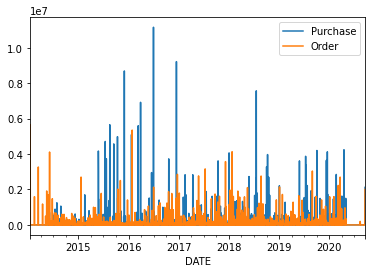

In [4]:
df=sql_query
df_gd=df.loc['2014':].groupby(pd.Grouper(freq='d'))['Purchase','Order'].sum()
df_gd.plot()

In [5]:
df_gd.head()

,Purchase,Order
DATE,,
2014-01-15,0.0,5652240.0
2014-01-16,0.0,0.0
2014-01-17,0.0,0.0
2014-01-18,0.0,0.0
2014-01-19,0.0,0.0


In [6]:
df_gd['Purchase_cumsum']=df_gd['Purchase'].cumsum()
df_gd['Order_cumsum']=df_gd['Order'].cumsum()
df_gd['Difference']=df_gd['Order']-df_gd['Purchase']
df_gd['Total']=(df_gd['Difference']).cumsum()
df_gd

,Purchase,Order,Purchase_cumsum,Order_cumsum,Difference,Total
DATE,,,,,,
2014-01-15,0.0,5652240.0,0.000000e+00,5.652240e+06,5652240.0,5.652240e+06
2014-01-16,0.0,0.0,0.000000e+00,5.652240e+06,0.0,5.652240e+06
2014-01-17,0.0,0.0,0.000000e+00,5.652240e+06,0.0,5.652240e+06
2014-01-18,0.0,0.0,0.000000e+00,5.652240e+06,0.0,5.652240e+06
2014-01-19,0.0,0.0,0.000000e+00,5.652240e+06,0.0,5.652240e+06
...,...,...,...,...,...,...
2020-09-12,0.0,0.0,4.073619e+08,2.848099e+08,0.0,-1.225520e+08
2020-09-13,0.0,0.0,4.073619e+08,2.848099e+08,0.0,-1.225520e+08
2020-09-14,0.0,0.0,4.073619e+08,2.848099e+08,0.0,-1.225520e+08


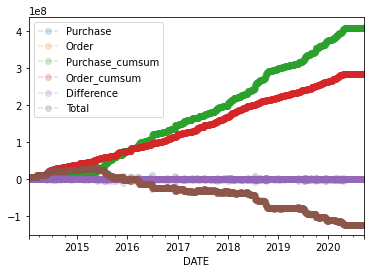

In [7]:
df_gd.plot(marker='o', alpha=0.2, linestyle='--',legend=True)

In [8]:
df_gm=df.loc['2014':].groupby(pd.Grouper(freq='m'))['Purchase','Order'].sum()
df_gm

<ipython-input-8-0ff6fe576f63>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_gm=df.loc['2014':].groupby(pd.Grouper(freq='m'))['Purchase','Order'].sum()


,Purchase,Order
DATE,,
2014-01-31,0.0,5652240.0
2014-02-28,0.0,1595675.0
2014-03-31,0.0,3270100.0
2014-04-30,0.0,1180760.0
2014-05-31,1444660.0,6396855.0
...,...,...
2020-05-31,0.0,0.0
2020-06-30,0.0,0.0
2020-07-31,0.0,0.0


In [9]:
df_gm['Purchase_cumsum']=df_gm['Purchase'].cumsum()
df_gm['Order_cumsum']=df_gm['Order'].cumsum()
df_gm['Difference']=df_gm['Order']-df_gm['Purchase']
df_gm['Total']=(df_gm['Difference']).cumsum()
df_gm

,Purchase,Order,Purchase_cumsum,Order_cumsum,Difference,Total
DATE,,,,,,
2014-01-31,0.0,5652240.0,0.000000e+00,5.652240e+06,5652240.0,5.652240e+06
2014-02-28,0.0,1595675.0,0.000000e+00,7.247915e+06,1595675.0,7.247915e+06
2014-03-31,0.0,3270100.0,0.000000e+00,1.051802e+07,3270100.0,1.051802e+07
2014-04-30,0.0,1180760.0,0.000000e+00,1.169878e+07,1180760.0,1.169878e+07
2014-05-31,1444660.0,6396855.0,1.444660e+06,1.809563e+07,4952195.0,1.665097e+07
...,...,...,...,...,...,...
2020-05-31,0.0,0.0,4.073619e+08,2.845487e+08,0.0,-1.228132e+08
2020-06-30,0.0,0.0,4.073619e+08,2.845487e+08,0.0,-1.228132e+08
2020-07-31,0.0,0.0,4.073619e+08,2.845487e+08,0.0,-1.228132e+08


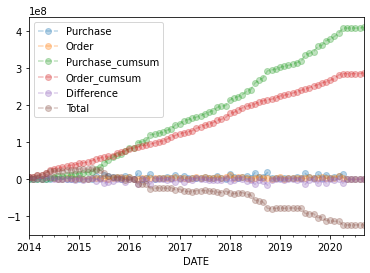

In [10]:
df_gm.plot(marker='o', alpha=0.3, linestyle='--',legend=True)

In [11]:
## Group by year ##
df_gy=df.loc['2014':].groupby(pd.Grouper(freq='y'))['Purchase','Order'].sum()
df_gy['Purchase_cumsum']=df_gy['Purchase'].cumsum()
df_gy['Order_cumsum']=df_gy['Order'].cumsum()
df_gy['Difference']=df_gy['Order']-df_gy['Purchase']
df_gy['Total']=(df_gy['Difference']).cumsum()
df_gy

<ipython-input-11-7474847f3981>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_gy=df.loc['2014':].groupby(pd.Grouper(freq='y'))['Purchase','Order'].sum()


,Purchase,Order,Purchase_cumsum,Order_cumsum,Difference,Total
DATE,,,,,,
2014-12-31,1.384832e+07,3.909676e+07,1.384832e+07,3.909676e+07,2.524844e+07,2.524844e+07
2015-12-31,6.337461e+07,3.700017e+07,7.722292e+07,7.609693e+07,-2.637443e+07,-1.125992e+06
2016-12-31,6.950342e+07,4.241585e+07,1.467263e+08,1.185128e+08,-2.708757e+07,-2.821356e+07
2017-12-31,5.181559e+07,4.813568e+07,1.985419e+08,1.666485e+08,-3.679914e+06,-3.189348e+07
2018-12-31,9.825631e+07,5.226786e+07,2.967982e+08,2.189163e+08,-4.598845e+07,-7.788193e+07
2019-12-31,7.660485e+07,4.346610e+07,3.734031e+08,2.623824e+08,-3.313875e+07,-1.110207e+08
2020-12-31,3.607882e+07,2.442753e+07,4.094819e+08,2.868099e+08,-1.165129e+07,-1.226720e+08


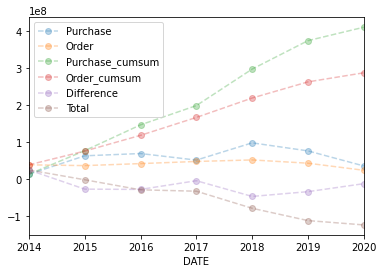

In [12]:
df_gy.plot(marker='o', alpha=0.3, linestyle='--',legend=True)

In [ ]:
insert_query = 'INSERT INTO pa VALUES '